In [ ]:
### purpose: plot correlation of normalized reads (Read Per Million - RPM) over block-
#            skipping junctions in mRNA and nRNA. Figure 4G
## input: output from script 7 (nRNA). Run the same script 7 on mRNA STAR alignment outputs to get
#         mRNA input. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
nRNA = pd.read_csv('nRNA_block_junctions_detected.csv')
mRNA= pd.read_csv('mRNA_block_junction_reads.csv')

In [3]:
# Filter mRNA to include only entries present in nRNA['block_coord']
mRNA_fil = mRNA[mRNA['block_coord'].isin(nRNA['block_coord'])].copy()

# Merge the required columns from nRNA into the filtered mRNA DataFrame
mRNA_fil = mRNA_fil.merge(
    nRNA[['block_coord', 'ctr_mean', 'kd_mean']],
    on='block_coord',
    how='left'
)


In [4]:
# Rename the newly added columns
mRNA_fil.rename(
    columns={'ctr_mean_y': 'ctr_mean_nRNA', 'kd_mean_y': 'kd_mean_nRNA', 'ctr_mean_x': 'ctr_mean_mRNA', 'kd_mean_x': 'kd_mean_mRNA'},
    inplace=True
)

In [5]:
# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(mRNA_fil['kd_mean_nRNA'], mRNA_fil['kd_mean_mRNA'])

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3e}")


Pearson Correlation Coefficient: 0.401
P-value: 1.428e-33


In [6]:
print((mRNA_fil['kd_mean_nRNA'] <= 0).sum())
print((mRNA_fil['kd_mean_mRNA'] <= 0).sum())


75
1


In [7]:
# Keep only rows with positive values
mRNA_fil_positive = mRNA_fil[
    (mRNA_fil['kd_mean_nRNA'] > 0) & (mRNA_fil['kd_mean_mRNA'] > 0)
].copy()


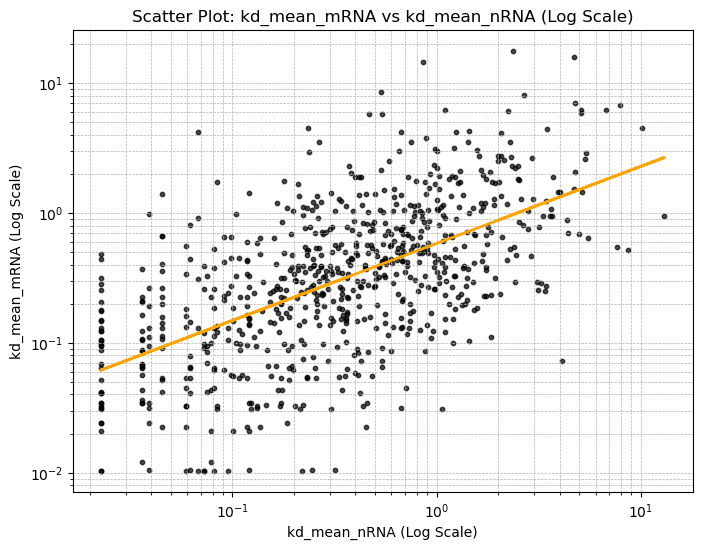

In [8]:
# Scatter plot with adjusted aesthetics
plt.figure(figsize=(8, 6))
plt.scatter(
    mRNA_fil_positive['kd_mean_nRNA'], 
    mRNA_fil_positive['kd_mean_mRNA'], 
    color='black', 
    s=10, 
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')

# Fit and plot a regression line
log_x = np.log(mRNA_fil_positive['kd_mean_nRNA'])
log_y = np.log(mRNA_fil_positive['kd_mean_mRNA'])
slope, intercept = np.polyfit(log_x, log_y, 1)
plt.plot(
    mRNA_fil_positive['kd_mean_nRNA'], 
    np.exp(slope * log_x + intercept), 
    color="orange", 
    linewidth=2
)

plt.title("Scatter Plot: kd_mean_mRNA vs kd_mean_nRNA (Log Scale)")
plt.xlabel("kd_mean_nRNA (Log Scale)")
plt.ylabel("kd_mean_mRNA (Log Scale)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig('correlation_block_skipping_junctions_mRNA_vs_nRNA.png')
plt.savefig('correlation_block_skipping_junctions_mRNA_vs_nRNA.pdf')
plt.show()
